# RetroTide prototype

Finds 'best' PKS designs for a given chemical structure

This notebook was designed as a test to build 10 commodity and 10 specialty chemicals

by Tyler W. H. Backman and Vincent Blay

In [1]:
# uncomment to install Retrotide
# import os
# os.system('cd ../ && pip3 install -e ./')

In [2]:
from retrotide import structureDB, designPKS
import retrotide

[12:56:48] product atom-mapping number 10 not found in reactants.
[12:56:48] product atom-mapping number 10 not found in reactants.
[12:56:48] product atom-mapping number 10 not found in reactants.
[12:56:48] product atom-mapping number 10 not found in reactants.
[12:56:48] product atom-mapping number 10 not found in reactants.
[12:56:48] product atom-mapping number 10 not found in reactants.
[12:56:48] product atom-mapping number 10 not found in reactants.
[12:56:48] product atom-mapping number 10 not found in reactants.
[12:56:48] product atom-mapping number 10 not found in reactants.
[12:56:48] product atom-mapping number 10 not found in reactants.
[12:56:48] product atom-mapping number 10 not found in reactants.


In [3]:
from rdkit import Chem
from rdkit.Chem import Draw, rdFMCS
%matplotlib inline

In [4]:
from collections import OrderedDict

### demo creating a cluster with BCS

In [5]:
testcluster = retrotide.Cluster(modules=[retrotide.allStarterTypes[0], retrotide.allModuleTypes[0], retrotide.allModuleTypes[1]])

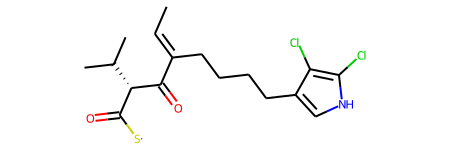

In [6]:
testcluster.computeProduct(structureDB)

### design some PKSs

computing module 1
   testing 1404 designs
   best score is 1.0
computing module 2
   testing 1350 designs
   best score is 1.0
PKS design: [["AT{'substrate': 'butmal'}", 'loading: True'], ["AT{'substrate': 'Malonyl-CoA'}", "KR{'type': 'B'}", 'DH{}', 'ER{}', 'loading: False']]
score: 1.0


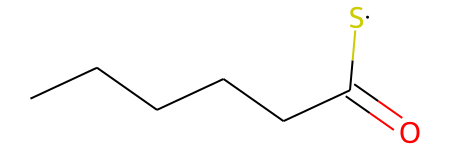

In [7]:
target = ('CCCCCC')

designs = designPKS(Chem.MolFromSmiles(target))
print('PKS design: ' + repr(designs[-1][0][0].modules))
print('score: ' + str(designs[-1][0][1]))
designs[-1][0][0].computeProduct(structureDB)

computing module 1
   testing 1404 designs
   best score is 0.08758568164508758
computing module 2
   testing 1350 designs
   best score is 0.16266866566716642
computing module 3
   testing 1350 designs
   best score is 0.24108416547788872
computing module 4
   testing 1350 designs
   best score is 0.32937892533147245
computing module 5
   testing 1350 designs
   best score is 0.37919684002633314
computing module 6
   testing 1350 designs
   best score is 0.4119804400977995
computing module 7
   testing 1350 designs
   best score is 0.41003948110547095
PKS design: [["AT{'substrate': 'DHCH'}", 'loading: True'], ["AT{'substrate': 'D-isobutmal'}", "KR{'type': 'B1'}", 'loading: False'], ["AT{'substrate': 'hexmal'}", "KR{'type': 'C1'}", 'loading: False'], ["AT{'substrate': 'D-isobutmal'}", "KR{'type': 'B1'}", 'loading: False'], ["AT{'substrate': 'D-isobutmal'}", "KR{'type': 'B1'}", 'loading: False'], ["AT{'substrate': 'mxmal'}", 'loading: False'], ["AT{'substrate': 'mxmal'}", "KR{'type': 'B

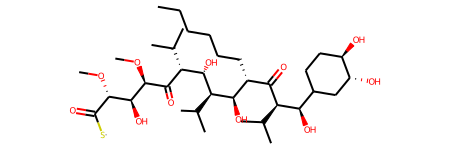

In [8]:
target = ('CC[C@@H]1[C@@]([C@@H]([C@H](C(=O)[C@@H](C[C@@]([C@@H]([C@H]([C@@H]'
          '([C@H](C(=O)O1)C)O[C@H]2C[C@@]([C@H]([C@@H](O2)C)O)(C)OC)C)O[C@H]'
          '3[C@@H]([C@H](C[C@H](O3)C)N(C)C)O)(C)O)C)C)O)(C)O')

designs = designPKS(Chem.MolFromSmiles(target))
print('PKS design: ' + repr(designs[-1][0][0].modules))
print('score: ' + str(designs[-1][0][1]))
designs[-1][0][0].computeProduct(structureDB)

### Test on a bunch of compounds

In [9]:
substrateLibrary = OrderedDict([
    # 10 commodity chemicals
    ('octane', 'CCCCCCCC'),
    ('Butanone', 'CCC(=O)C'),
    ('2-pentanone', 'O=C(C)CCC'),
    ('caprolactone', 'C1CCC(=O)OCC1'),
    ('Acrylic acid', 'C=CC(=O)O'),
    ('Adipic acid', 'O=C(O)CCCCC(=O)O'),
    ('Maleic acid', 'O=C(O)\C=C/C(=O)O'),
    ('Propionic acid', 'CCC(=O)O'),
    ('Dodecane', 'CCCCCCCCCCCC'),
    ('Linolenic acid ', 'O=C(O)CCCC\C=C/C\C=C/C\C=C/CCCCC'),
    
    # 10 specialty chemicals
    ('1,2,4-Butanetriol', 'C(CO)[C@@H](CO)O'),
    ('γ-Valerolactone', 'CC1CCC(=O)O1'),
    ('Narbonolide', 'CC[C@@H]1[C@@H](/C=C/C(=O)[C@@H](C[C@@H]([C@@H]([C@H](C(=O)[C@H](C(=O)O1)C)C)O)C)C)C'),
    ('Polyhydroxyethylmethacrylate', 'CCCCCCCCC=CCCCCCCCCOCC(C[N+](C)(C)CCOCCO)OCCCCCCCCC=CCCCCCCCC'),
    ('Alitretinoin', 'C\C(\C=C\C1=C(C)CCCC1(C)C)=C\C=C\C(\C)=C\C(O)=O'),
    ('alpha-Amyl cinnamaldehyde', 'CCCCC\C(C=O)=C\C1=CC=CC=C1'),
    ('Aminocaproic acid', 'NCCCCCC(O)=O'),
    ('Aminolevulinic acid', 'NCC(=O)CCC(O)=O'),
    ('Azelaic acid', 'OC(=O)CCCCCCCC(O)=O'),
    ('Bempedoic acid', 'CC(C)(CCCCCC(O)CCCCCC(C)(C)C(O)=O)C(O)=O'),
])

In [10]:
def plotMolComparison(mol1, mol2):
    
    # convert to smiles and back to fix internal bug in RDKit
    # mol1 = Chem.MolFromSmiles(Chem.MolToSmiles(mol1, isomericSmiles=True))
    # mol2 = Chem.MolFromSmiles(Chem.MolToSmiles(mol2, isomericSmiles=True))
    
    # compute MCS between mol and comparisonStructure
    mcsComp = rdFMCS.FindMCS([mol1, mol2], timeout=1, matchValences=True, matchChiralTag=False, bondCompare=Chem.rdFMCS.BondCompare.CompareOrderExact) # search for 1 second max
    
    score = mcsComp.numAtoms / (len(mol1.GetAtoms()) + len(mol2.GetAtoms()) - mcsComp.numAtoms)
    display(score)
    mcsCompSmarts = Chem.MolFromSmarts(mcsComp.smartsString)
    molHighlightAtomList = mol1.GetSubstructMatch(mcsCompSmarts)
    compHighlightAtomList = mol2.GetSubstructMatch(mcsCompSmarts)
    
    # plot SVG with RDKit 
    return Draw.MolsToGridImage([
        mol1, mol2], 
        legends=['', ''], 
        molsPerRow=2, 
        highlightAtomLists=[molHighlightAtomList, compHighlightAtomList], 
        useSVG=True, 
        subImgSize=(400, 400))

#### building octane ####
computing module 1
   testing 1404 designs
   best score is 0.8888888888888888
computing module 2
   testing 1350 designs
   best score is 0.8
PKS design: [["AT{'substrate': 'prop'}", 'loading: True'], ["AT{'substrate': 'butmal'}", "KR{'type': 'B1'}", 'DH{}', 'ER{}', 'loading: False']]
score: 0.8888888888888888


0.7272727272727273

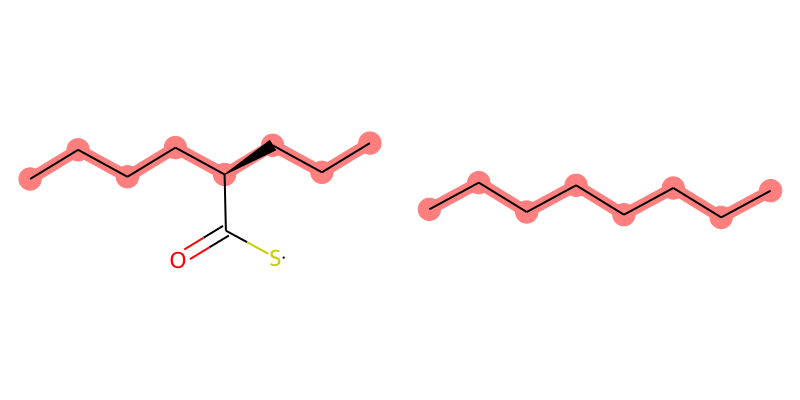

#### building Butanone ####
computing module 1
   testing 1404 designs
   best score is 1.0
computing module 2
   testing 1350 designs
   best score is 0.7142857142857143
PKS design: [["AT{'substrate': 'Methylmalonyl-CoA'}", 'loading: True'], ["AT{'substrate': 'Malonyl-CoA'}", 'loading: False']]
score: 1.0


0.7142857142857143

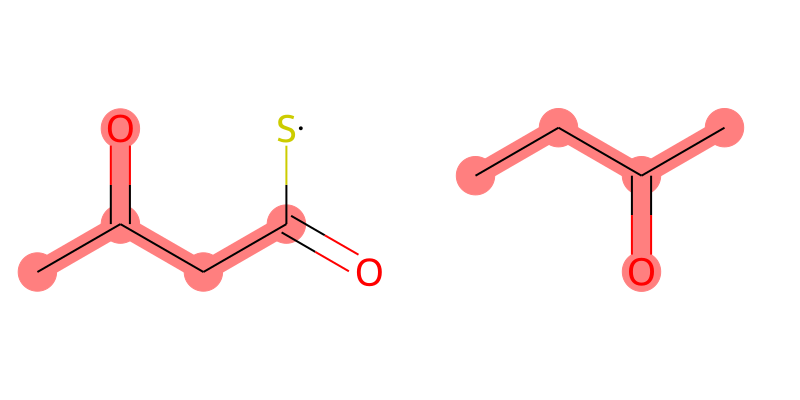

#### building 2-pentanone ####
computing module 1
   testing 1404 designs
   best score is 0.8571428571428571
computing module 2
   testing 1350 designs
   best score is 0.8571428571428571
PKS design: [["AT{'substrate': 'Methylmalonyl-CoA'}", 'loading: True'], ["AT{'substrate': 'emal'}", "KR{'type': 'C1'}", 'loading: False']]
score: 0.8571428571428571


0.6666666666666666

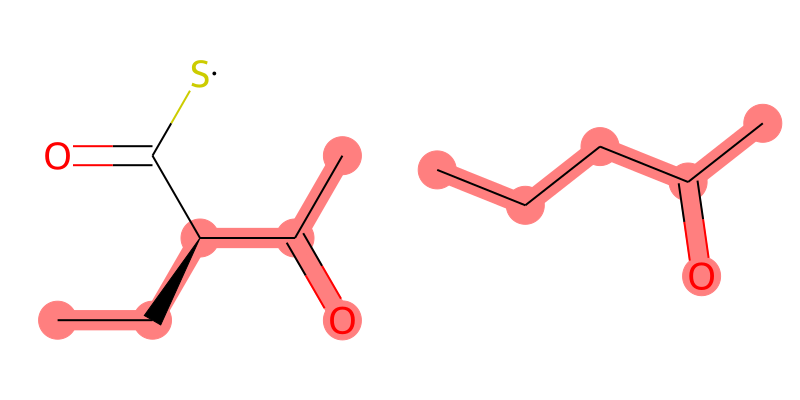

#### building caprolactone ####
computing module 1
   testing 1404 designs
   best score is 0.75
computing module 2
   testing 1350 designs
   best score is 0.7777777777777778
computing module 3
   testing 1350 designs
   best score is 0.7272727272727273
PKS design: [["AT{'substrate': 'mxmal'}", 'loading: True'], ["AT{'substrate': 'Malonyl-CoA'}", "KR{'type': 'B'}", 'DH{}', 'ER{}', 'loading: False'], ["AT{'substrate': 'Malonyl-CoA'}", "KR{'type': 'B'}", 'DH{}', 'ER{}', 'loading: False']]
score: 0.7777777777777778


0.8

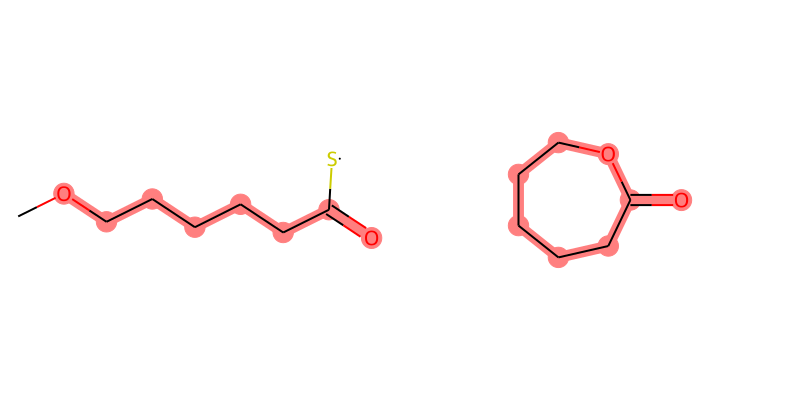

#### building Acrylic acid ####
computing module 1
   testing 1404 designs
   best score is 0.5714285714285714
computing module 2
   testing 1350 designs
   best score is 0.5
PKS design: [["AT{'substrate': 'mxmal'}", 'loading: True'], ["AT{'substrate': 'Malonyl-CoA'}", "KR{'type': 'B'}", 'DH{}', 'loading: False']]
score: 0.5714285714285714


0.4444444444444444

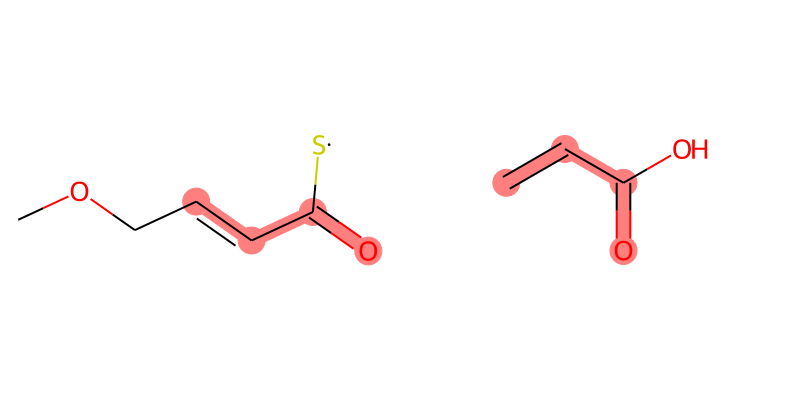

#### building Adipic acid ####
computing module 1
   testing 1404 designs
   best score is 0.6153846153846154
computing module 2
   testing 1350 designs
   best score is 0.6
PKS design: [["AT{'substrate': 'trans-1,2-CPDA'}", 'loading: True'], ["AT{'substrate': 'Malonyl-CoA'}", "KR{'type': 'B'}", 'DH{}', 'ER{}', 'loading: False']]
score: 0.6153846153846154


0.6428571428571429

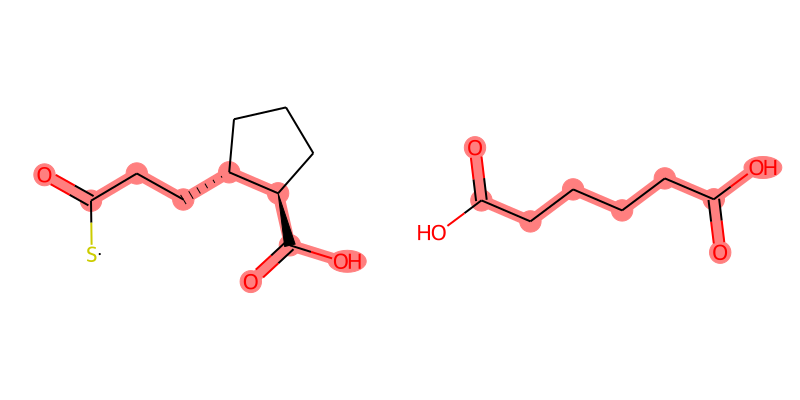

#### building Maleic acid ####
computing module 1
   testing 1404 designs
   best score is 0.3
computing module 2
   testing 1350 designs
   best score is 0.25
PKS design: [["AT{'substrate': 'Methylmalonyl-CoA'}", 'loading: True'], ["AT{'substrate': 'hmal'}", "KR{'type': 'B1'}", 'DH{}', 'loading: False']]
score: 0.3


0.5

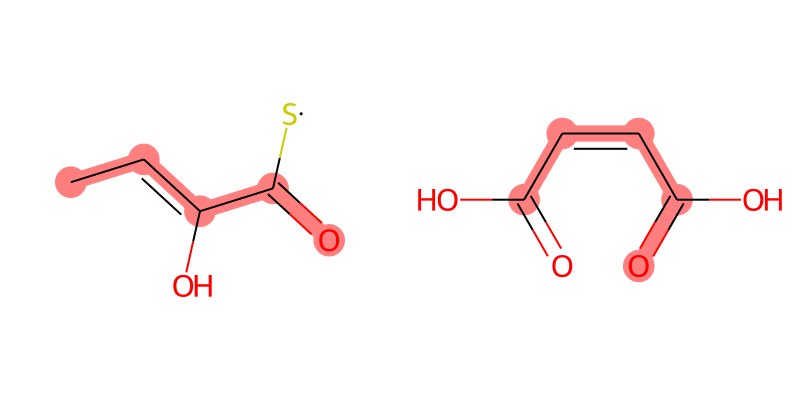

#### building Propionic acid ####
computing module 1
   testing 1404 designs
   best score is 0.6666666666666666
computing module 2
   testing 1350 designs
   best score is 0.5
PKS design: [["AT{'substrate': 'Methylmalonyl-CoA'}", 'loading: True'], ["AT{'substrate': 'Malonyl-CoA'}", "KR{'type': 'B'}", 'loading: False']]
score: 0.6666666666666666


0.5

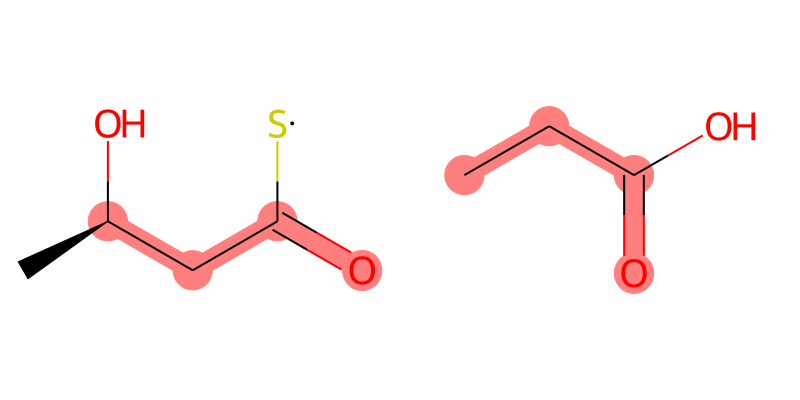

#### building Dodecane ####
computing module 1
   testing 1404 designs
   best score is 0.9230769230769231
computing module 2
   testing 1350 designs
   best score is 0.9230769230769231
PKS design: [["AT{'substrate': 'CHC-CoA'}", 'loading: True'], ["AT{'substrate': 'butmal'}", "KR{'type': 'B1'}", 'DH{}', 'ER{}', 'loading: False']]
score: 0.9230769230769231


0.8

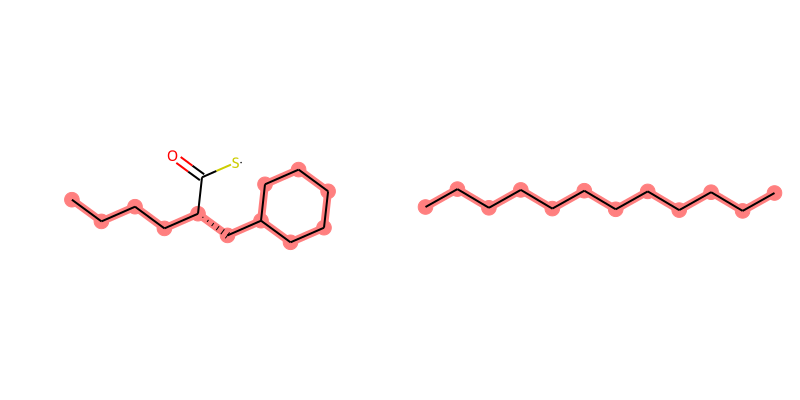

#### building Linolenic acid  ####
computing module 1
   testing 1404 designs
   best score is 0.30434782608695654
computing module 2
   testing 1350 designs
   best score is 0.3181818181818182
computing module 3
   testing 1350 designs
   best score is 0.2916666666666667
PKS design: [["AT{'substrate': 'butmal'}", 'loading: True'], ["AT{'substrate': 'Malonyl-CoA'}", "KR{'type': 'B'}", 'DH{}', 'ER{}', 'loading: False'], ["AT{'substrate': 'Malonyl-CoA'}", 'loading: False']]
score: 0.3181818181818182


0.2916666666666667

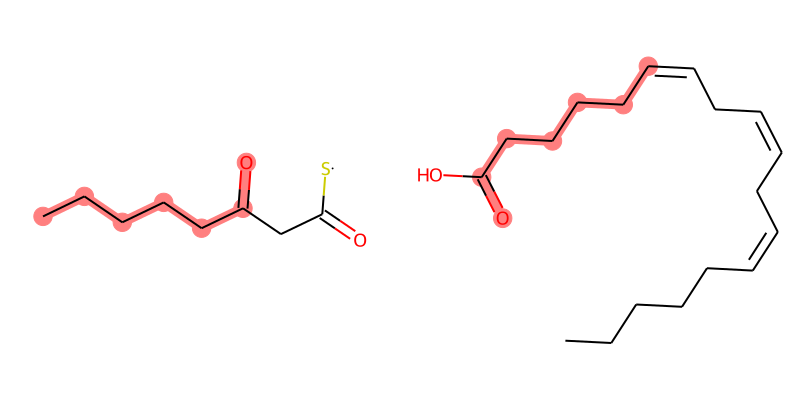

#### building 1,2,4-Butanetriol ####
computing module 1
   testing 1404 designs
   best score is 0.75
computing module 2
   testing 1350 designs
   best score is 0.7
PKS design: [["AT{'substrate': 'mxmal'}", 'loading: True'], ["AT{'substrate': 'Malonyl-CoA'}", "KR{'type': 'B'}", 'loading: False']]
score: 0.75


0.6

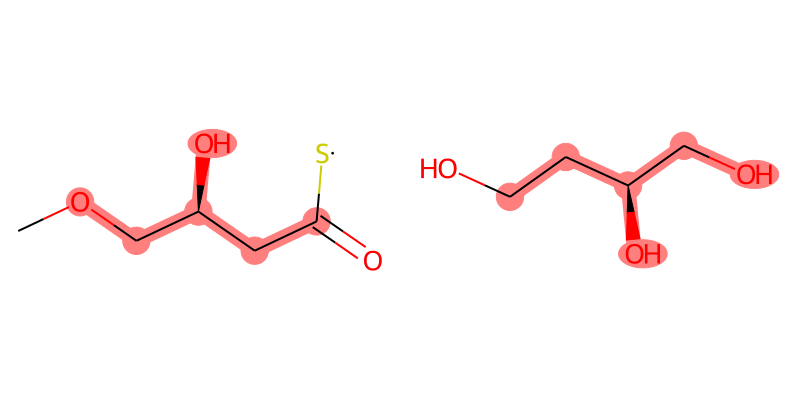

#### building γ-Valerolactone ####
computing module 1
   testing 1404 designs
   best score is 0.75
computing module 2
   testing 1350 designs
   best score is 0.7
PKS design: [["AT{'substrate': 'prop'}", 'loading: True'], ["AT{'substrate': 'hmal'}", 'loading: False']]
score: 0.75


0.6

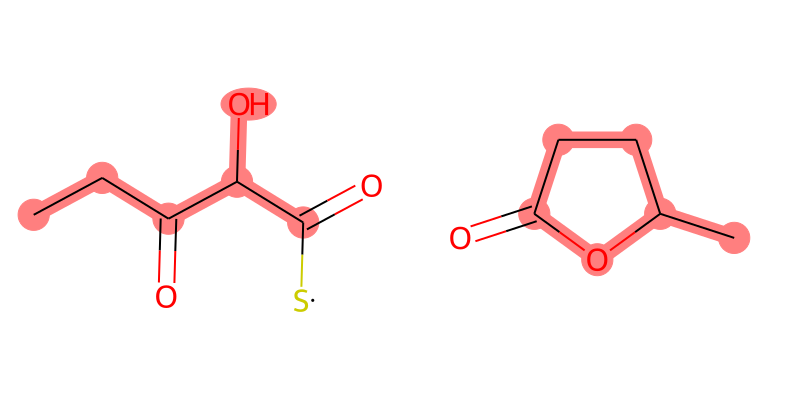

#### building Narbonolide ####
computing module 1
   testing 1404 designs
   best score is 0.52
computing module 2
   testing 1350 designs
   best score is 0.5
PKS design: [["AT{'substrate': 'isobut'}", 'loading: True'], ["AT{'substrate': 'hexmal'}", 'loading: False']]
score: 0.52


0.48148148148148145

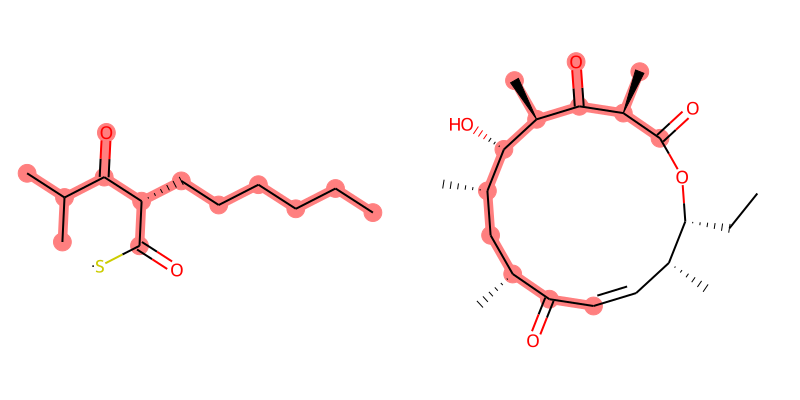

#### building Polyhydroxyethylmethacrylate ####
computing module 1
   testing 1404 designs
   best score is 0.27450980392156865
computing module 2
   testing 1350 designs
   best score is 0.3137254901960784
computing module 3
   testing 1350 designs
   best score is 0.3018867924528302
PKS design: [["AT{'substrate': 'CHC-CoA'}", 'loading: True'], ["AT{'substrate': 'Malonyl-CoA'}", "KR{'type': 'B'}", 'DH{}', 'ER{}', 'loading: False'], ["AT{'substrate': 'hexmal'}", "KR{'type': 'B1'}", 'DH{}', 'loading: False']]
score: 0.3137254901960784


0.3018867924528302

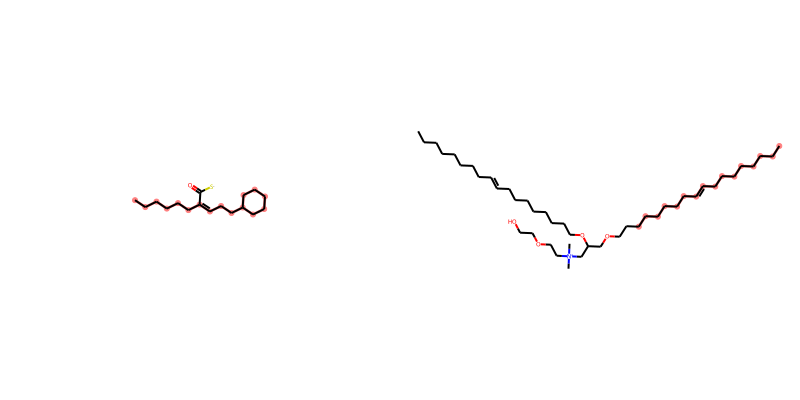

#### building Alitretinoin ####
computing module 1
   testing 1404 designs
   best score is 0.4090909090909091
computing module 2
   testing 1350 designs
   best score is 0.391304347826087
PKS design: [["AT{'substrate': 'butmal'}", 'loading: True'], ["AT{'substrate': 'D-isobutmal'}", "KR{'type': 'B1'}", 'DH{}', 'loading: False']]
score: 0.4090909090909091


0.375

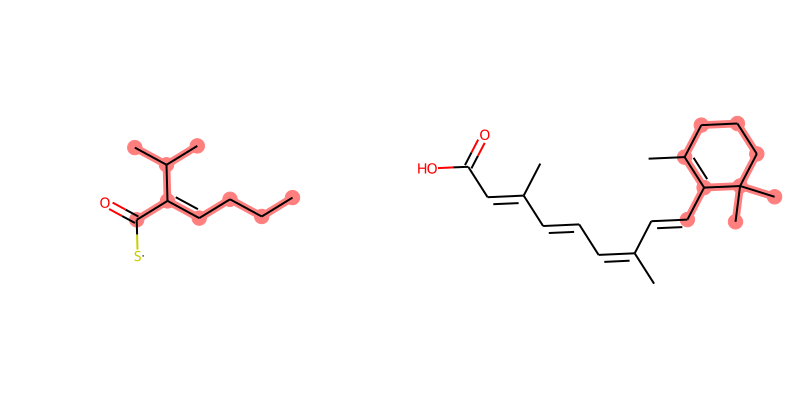

#### building alpha-Amyl cinnamaldehyde ####
computing module 1
   testing 1404 designs
   best score is 0.47058823529411764
computing module 2
   testing 1350 designs
   best score is 0.4444444444444444
PKS design: [["AT{'substrate': 'CHC-CoA'}", 'loading: True'], ["AT{'substrate': 'Malonyl-CoA'}", 'loading: False']]
score: 0.47058823529411764


0.42105263157894735

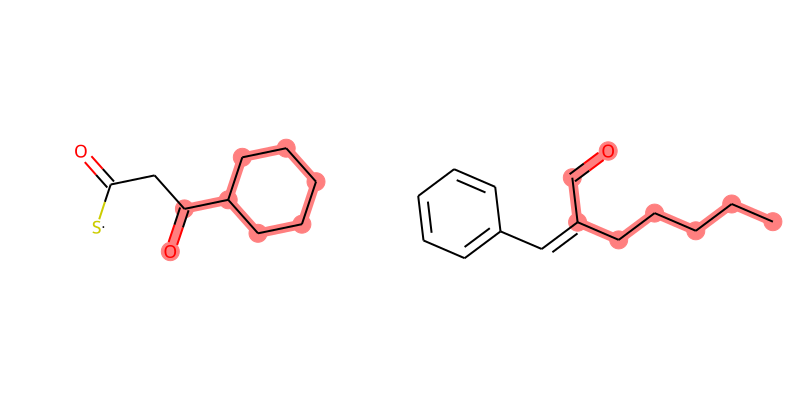

#### building Aminocaproic acid ####
computing module 1
   testing 1404 designs
   best score is 0.6666666666666666
computing module 2
   testing 1350 designs
   best score is 0.6363636363636364
PKS design: [["AT{'substrate': 'butmal'}", 'loading: True'], ["AT{'substrate': 'Malonyl-CoA'}", "KR{'type': 'B'}", 'DH{}', 'ER{}', 'loading: False']]
score: 0.6666666666666666


0.7

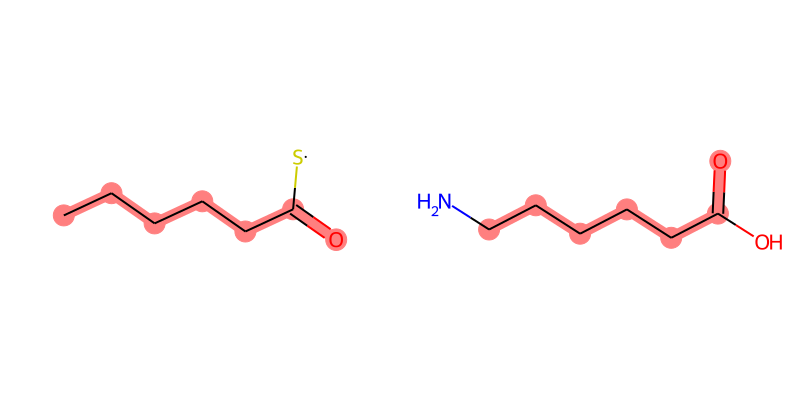

#### building Aminolevulinic acid ####
computing module 1
   testing 1404 designs
   best score is 0.6153846153846154
computing module 2
   testing 1350 designs
   best score is 0.6363636363636364
computing module 3
   testing 1350 designs
   best score is 0.5384615384615384
PKS design: [["AT{'substrate': 'Methylmalonyl-CoA'}", 'loading: True'], ["AT{'substrate': 'Malonyl-CoA'}", 'loading: False'], ["AT{'substrate': 'mxmal'}", "KR{'type': 'B1'}", 'DH{}', 'ER{}', 'loading: False']]
score: 0.6363636363636364


0.5384615384615384

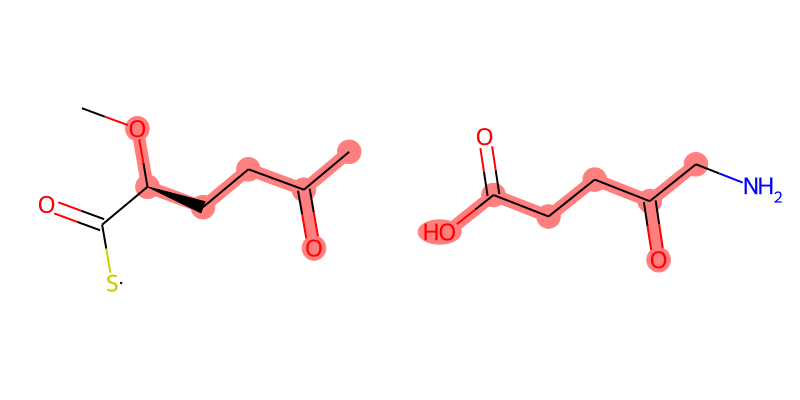

#### building Azelaic acid ####
computing module 1
   testing 1404 designs
   best score is 0.7857142857142857
computing module 2
   testing 1350 designs
   best score is 0.75
PKS design: [["AT{'substrate': 'trans-1,2-CPDA'}", 'loading: True'], ["AT{'substrate': 'Methylmalonyl-CoA'}", "KR{'type': 'B1'}", 'DH{}', 'ER{}', 'loading: False']]
score: 0.7857142857142857


0.8

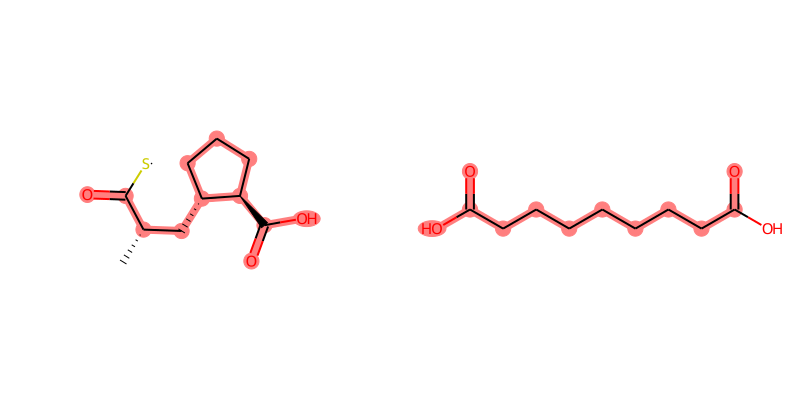

#### building Bempedoic acid ####
computing module 1
   testing 1404 designs
   best score is 0.4838709677419355
computing module 2
   testing 1350 designs
   best score is 0.5
computing module 3
   testing 1350 designs
   best score is 0.56
computing module 4
   testing 1350 designs
   best score is 0.64
computing module 5
   testing 1350 designs
   best score is 0.6296296296296297
PKS design: [["AT{'substrate': 'CHC-CoA'}", 'loading: True'], ["AT{'substrate': 'hmal'}", 'loading: False'], ["AT{'substrate': 'Malonyl-CoA'}", "KR{'type': 'B'}", 'DH{}', 'ER{}', 'loading: False'], ["AT{'substrate': 'Malonyl-CoA'}", "KR{'type': 'B'}", 'DH{}', 'ER{}', 'loading: False'], ["AT{'substrate': 'Malonyl-CoA'}", "KR{'type': 'B'}", 'DH{}', 'ER{}', 'loading: False']]
score: 0.64


0.6538461538461539

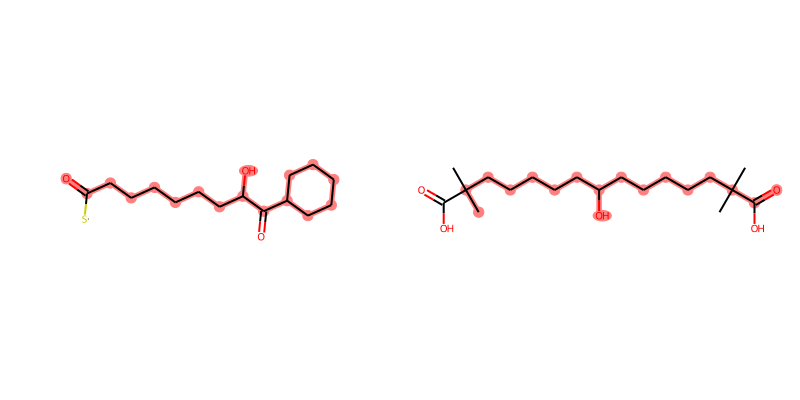

CPU times: total: 1min 34s
Wall time: 1min 34s


In [11]:
%%time
for name, smiles in substrateLibrary.items():
    print('#### building ' + name + ' ####')
    targetMol = Chem.MolFromSmiles(smiles)
    designs = designPKS(targetMol, maxDesignsPerRound=25, similarity='mcs')
    print('PKS design: ' + repr(designs[-1][0][0].modules))
    print('score: ' + str(designs[-1][0][1]))
    product = designs[-1][0][0].computeProduct(structureDB)
    
    display(plotMolComparison(product, targetMol))

## Exploring other similarity metrics

In [12]:
from rdkit.Chem import AllChem
from rdkit import Chem, DataStructs

#### building octane ####
computing module 1
   testing 1404 designs


c:\users\vinbl\desktop\lbnl\bcs_repo\ppi_package\retrotide\AtomAtomPathSimilarity.py:122: RuntimeWarning: overflow encountered in ushort_scalars
  val2 = val1 * numpy.ushort(_nAT_)
c:\users\vinbl\desktop\lbnl\bcs_repo\ppi_package\retrotide\AtomAtomPathSimilarity.py:126: RuntimeWarning: overflow encountered in ushort_scalars
  val4 = val3 * numpy.ushort(_nBT_)
c:\users\vinbl\desktop\lbnl\bcs_repo\ppi_package\retrotide\AtomAtomPathSimilarity.py:125: RuntimeWarning: overflow encountered in ushort_scalars
  val3 = val2 + numpy.ushort(ai)
c:\users\vinbl\desktop\lbnl\bcs_repo\ppi_package\retrotide\AtomAtomPathSimilarity.py:121: RuntimeWarning: overflow encountered in ushort_scalars
  val1 = pathuniqueint + numpy.ushort(bi)


   best score is 0.6822429906542054
computing module 2
   testing 1350 designs
   best score is 0.5517241379310344
PKS design: [["AT{'substrate': 'Methylmalonyl-CoA'}", 'loading: True'], ["AT{'substrate': 'butmal'}", "KR{'type': 'B1'}", 'DH{}', 'ER{}', 'loading: False']]
score: 0.6822429906542054


0.6363636363636364

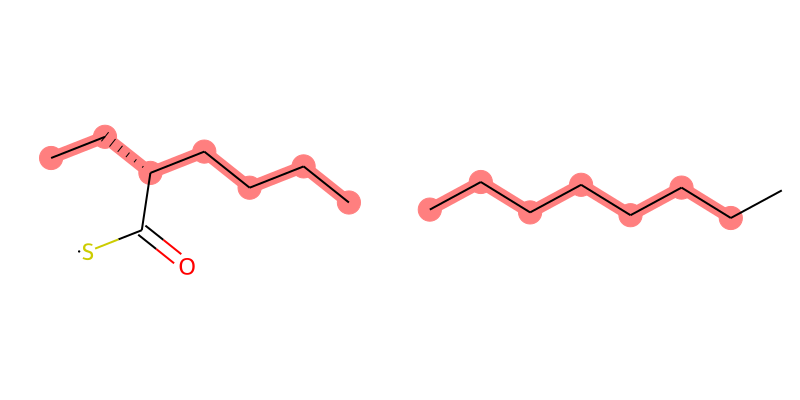

#### building Butanone ####
computing module 1
   testing 1404 designs
   best score is 1.0
computing module 2
   testing 1350 designs
   best score is 0.24752475247524752
PKS design: [["AT{'substrate': 'Methylmalonyl-CoA'}", 'loading: True'], ["AT{'substrate': 'Malonyl-CoA'}", 'loading: False']]
score: 1.0


0.7142857142857143

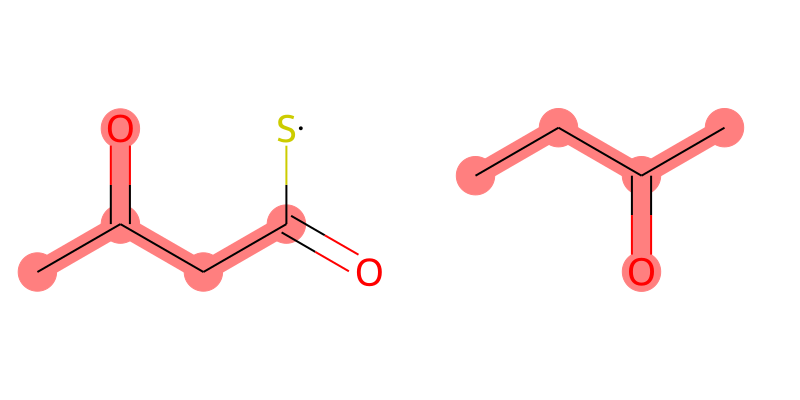

#### building 2-pentanone ####
computing module 1
   testing 1404 designs
   best score is 0.5555555555555556
computing module 2
   testing 1350 designs
   best score is 0.47368421052631576
PKS design: [["AT{'substrate': 'prop'}", 'loading: True'], ["AT{'substrate': 'Malonyl-CoA'}", 'loading: False']]
score: 0.5555555555555556


0.5555555555555556

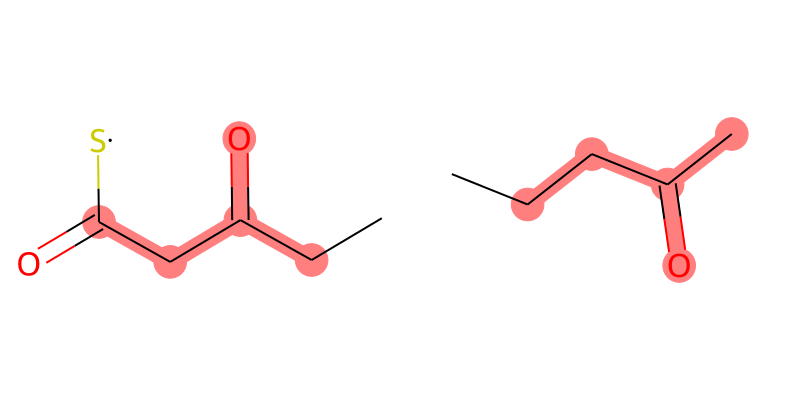

#### building caprolactone ####
computing module 1
   testing 1404 designs
   best score is 0.13939343377429544
computing module 2
   testing 1350 designs
   best score is 0.14340576778764455
computing module 3
   testing 1350 designs
   best score is 0.13100491741268439
PKS design: [["AT{'substrate': 'mxmal'}", 'loading: True'], ["AT{'substrate': 'Methylmalonyl-CoA'}", 'loading: False'], ["AT{'substrate': 'Malonyl-CoA'}", "KR{'type': 'B'}", 'DH{}', 'ER{}', 'loading: False']]
score: 0.14340576778764455


0.6666666666666666

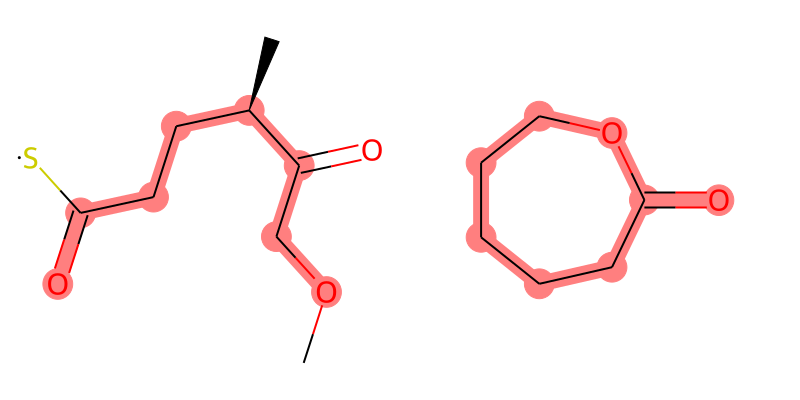

#### building Acrylic acid ####
computing module 1
   testing 1404 designs
   best score is 0.2068965517241379
computing module 2
   testing 1350 designs
   best score is 0.12903225806451613
PKS design: [["AT{'substrate': 'Methylmalonyl-CoA'}", 'loading: True'], ["AT{'substrate': 'hmal'}", "KR{'type': 'B1'}", 'DH{}', 'loading: False']]
score: 0.2068965517241379


0.5

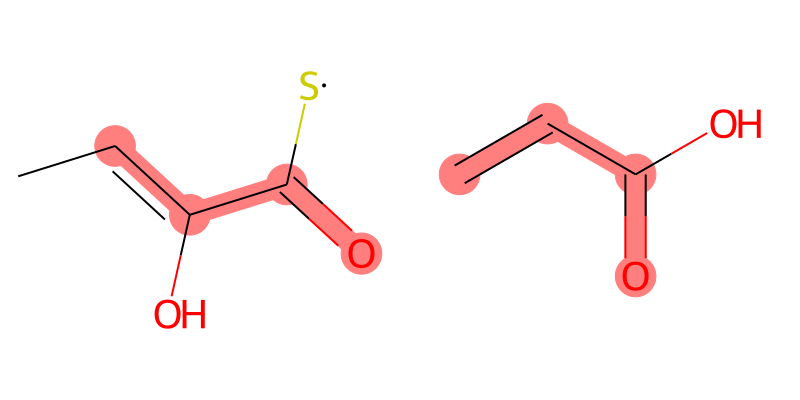

#### building Adipic acid ####
computing module 1
   testing 1404 designs
   best score is 0.24232081911262796
computing module 2
   testing 1350 designs
   best score is 0.2397820163487738
PKS design: [["AT{'substrate': 'ema'}", 'loading: True'], ["AT{'substrate': 'Malonyl-CoA'}", "KR{'type': 'B'}", 'loading: False']]
score: 0.24232081911262796


0.4666666666666667

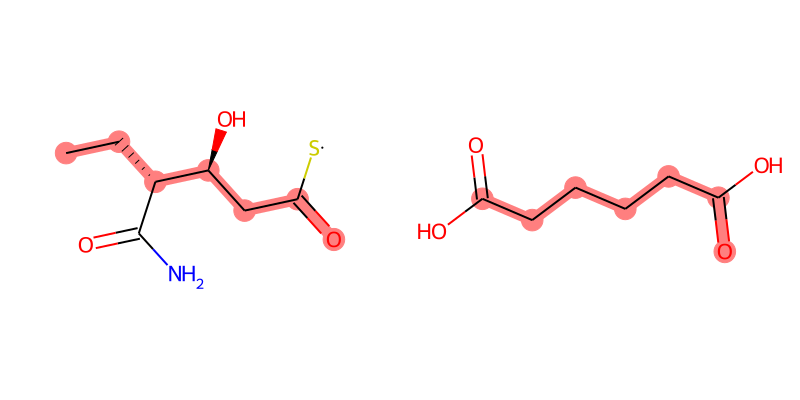

#### building Maleic acid ####
computing module 1
   testing 1404 designs
   best score is 0.1854922279792746
computing module 2
   testing 1350 designs
   best score is 0.2
computing module 3
   testing 1350 designs
   best score is 0.14754098360655735
PKS design: [["AT{'substrate': 'mxmal'}", 'loading: True'], ["AT{'substrate': 'Malonyl-CoA'}", "KR{'type': 'B'}", 'DH{}', 'loading: False'], ["AT{'substrate': 'Malonyl-CoA'}", "KR{'type': 'B'}", 'loading: False']]
score: 0.2


0.46153846153846156

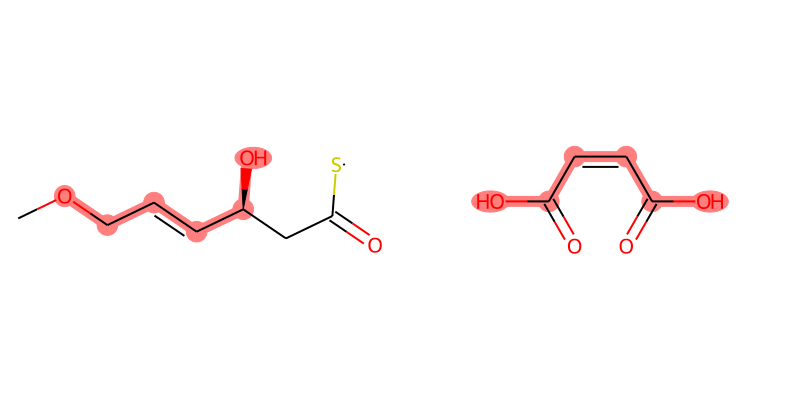

#### building Propionic acid ####
computing module 1
   testing 1404 designs
   best score is 0.3636363636363636
computing module 2
   testing 1350 designs
   best score is 0.12903225806451613
PKS design: [["AT{'substrate': 'Methylmalonyl-CoA'}", 'loading: True'], ["AT{'substrate': 'Malonyl-CoA'}", "KR{'type': 'B'}", 'loading: False']]
score: 0.3636363636363636


0.5

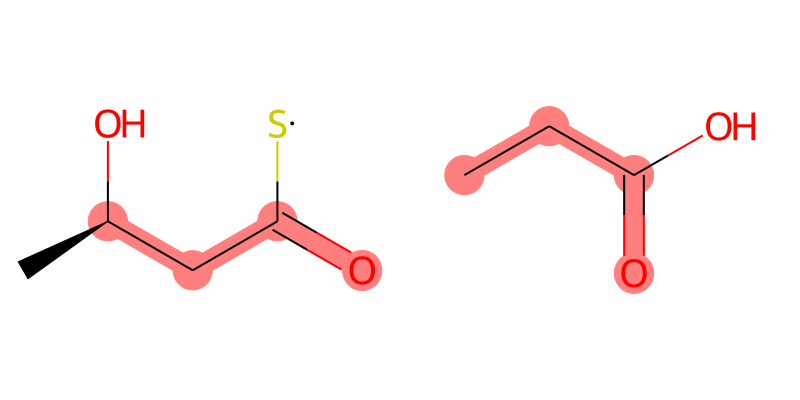

#### building Dodecane ####
computing module 1
   testing 1404 designs
   best score is 0.7209621074096978
computing module 2
   testing 1350 designs
   best score is 0.616460661683073
PKS design: [["AT{'substrate': 'butmal'}", 'loading: True'], ["AT{'substrate': 'hexmal'}", "KR{'type': 'B1'}", 'DH{}', 'ER{}', 'loading: False']]
score: 0.7209621074096978


0.7333333333333333

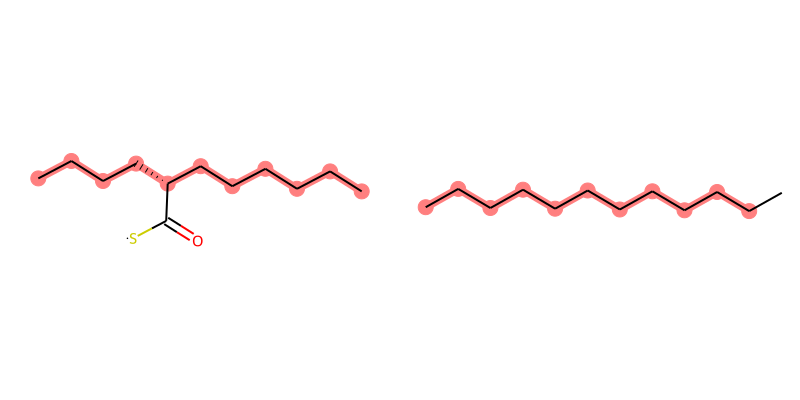

#### building Linolenic acid  ####
computing module 1
   testing 1404 designs
   best score is 0.20316048109227144
computing module 2
   testing 1350 designs
   best score is 0.23167719697083552
computing module 3
   testing 1350 designs
   best score is 0.2240692550808638
PKS design: [["AT{'substrate': 'prop'}", 'loading: True'], ["AT{'substrate': 'hexmal'}", "KR{'type': 'B1'}", 'DH{}', 'loading: False'], ["AT{'substrate': 'hexmal'}", "KR{'type': 'B1'}", 'DH{}', 'loading: False']]
score: 0.23167719697083552


0.28125

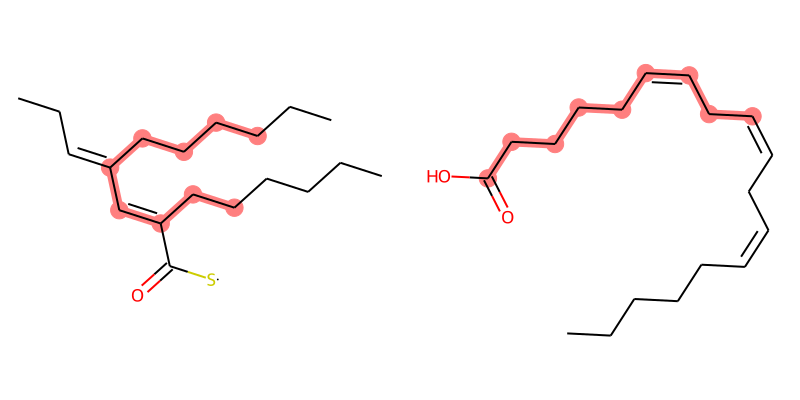

#### building 1,2,4-Butanetriol ####
computing module 1
   testing 1404 designs
   best score is 0.47368421052631576
computing module 2
   testing 1350 designs
   best score is 0.3288590604026845
PKS design: [["AT{'substrate': 'mxmal'}", 'loading: True'], ["AT{'substrate': 'Malonyl-CoA'}", "KR{'type': 'B'}", 'loading: False']]
score: 0.47368421052631576


0.6

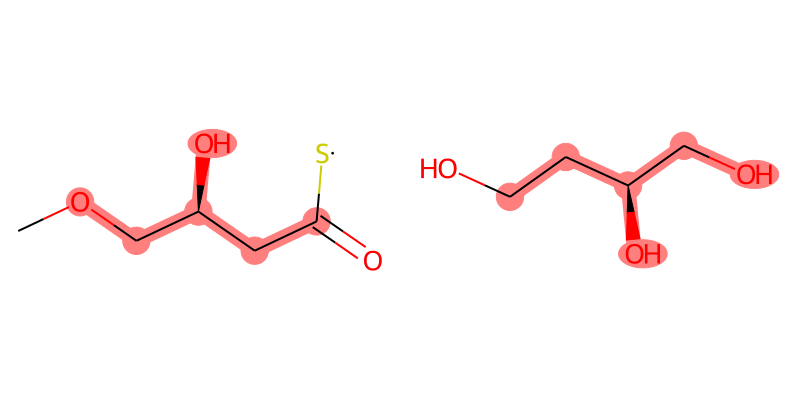

#### building γ-Valerolactone ####
computing module 1
   testing 1404 designs
   best score is 0.1524945770065076
computing module 2
   testing 1350 designs
   best score is 0.14240321097081696
PKS design: [["AT{'substrate': 'prop'}", 'loading: True'], ["AT{'substrate': 'mxmal'}", "KR{'type': 'B1'}", 'DH{}', 'ER{}', 'loading: False']]
score: 0.1524945770065076


0.6

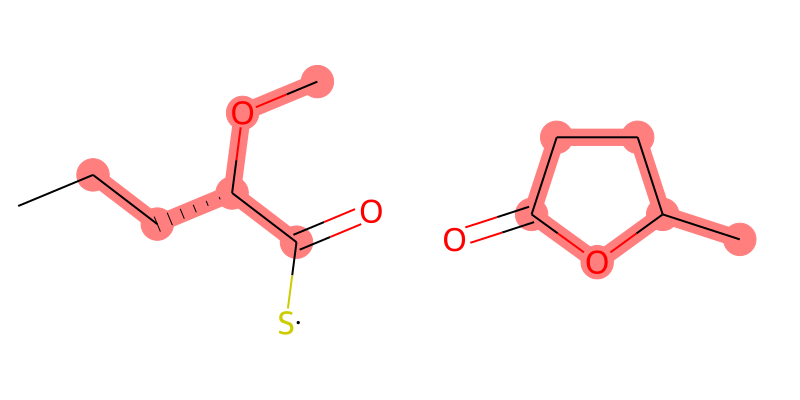

#### building Narbonolide ####
computing module 1
   testing 1404 designs
   best score is 0.1834899383118102
computing module 2
   testing 1350 designs
   best score is 0.22422801908368875
computing module 3
   testing 1350 designs
   best score is 0.2266061465802938
computing module 4
   testing 1350 designs
   best score is 0.20896228862730348
PKS design: [["AT{'substrate': 'DHCHene'}", 'loading: True'], ["AT{'substrate': 'hexmal'}", "KR{'type': 'C1'}", 'loading: False'], ["AT{'substrate': 'emal'}", "KR{'type': 'C1'}", 'loading: False'], ["AT{'substrate': 'Malonyl-CoA'}", "KR{'type': 'B'}", 'loading: False']]
score: 0.2266061465802938


0.5588235294117647

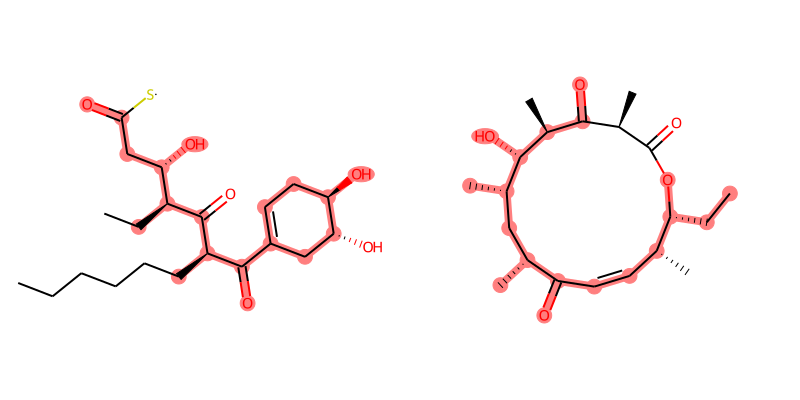

#### building Polyhydroxyethylmethacrylate ####
computing module 1
   testing 1404 designs
   best score is 0.09094447533751981
computing module 2
   testing 1350 designs
   best score is 0.14734892312916295
computing module 3
   testing 1350 designs
   best score is 0.182312240716482
computing module 4
   testing 1350 designs
   best score is 0.21645844480785711
computing module 5
   testing 1350 designs
   best score is 0.22836891935059697
computing module 6
   testing 1350 designs
   best score is 0.23216147309761428
computing module 7
   testing 1350 designs
   best score is 0.2361310178717197
computing module 8
   testing 1350 designs
   best score is 0.2325875922198853
PKS design: [["AT{'substrate': 'Methylmalonyl-CoA'}", 'loading: True'], ["AT{'substrate': 'hexmal'}", "KR{'type': 'B1'}", 'DH{}', 'ER{}', 'loading: False'], ["AT{'substrate': 'hexmal'}", "KR{'type': 'B1'}", 'DH{}', 'loading: False'], ["AT{'substrate': 'hexmal'}", "KR{'type': 'B1'}", 'DH{}', 'ER{}', 'loading: False'

0.2

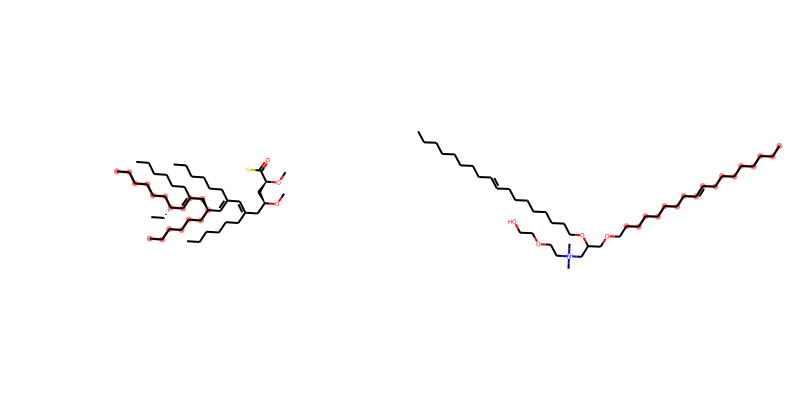

#### building Alitretinoin ####
computing module 1
   testing 1404 designs
   best score is 0.16622173918562302
computing module 2
   testing 1350 designs
   best score is 0.22134735672358258
computing module 3
   testing 1350 designs
   best score is 0.2779589734818252
computing module 4
   testing 1350 designs
   best score is 0.31292130663739104
computing module 5
   testing 1350 designs
   best score is 0.2870044048895305
PKS design: [["AT{'substrate': 'DHCHene'}", 'loading: True'], ["AT{'substrate': 'D-isobutmal'}", "KR{'type': 'B1'}", 'DH{}', 'loading: False'], ["AT{'substrate': 'emal'}", "KR{'type': 'B1'}", 'DH{}', 'loading: False'], ["AT{'substrate': 'Malonyl-CoA'}", "KR{'type': 'B'}", 'DH{}', 'loading: False'], ["AT{'substrate': 'Malonyl-CoA'}", "KR{'type': 'B'}", 'DH{}', 'loading: False']]
score: 0.31292130663739104


0.5333333333333333

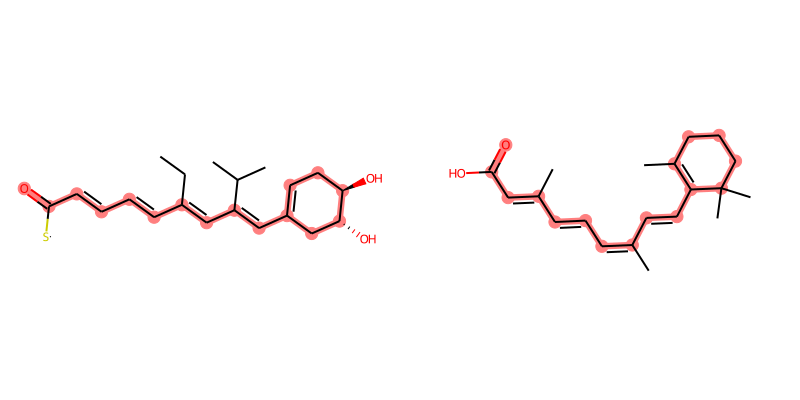

#### building alpha-Amyl cinnamaldehyde ####
computing module 1
   testing 1404 designs
   best score is 0.7102654180791248
computing module 2
   testing 1350 designs
   best score is 0.5902204274105047
PKS design: [["AT{'substrate': 'benz'}", 'loading: True'], ["AT{'substrate': 'hexmal'}", "KR{'type': 'B1'}", 'DH{}', 'loading: False']]
score: 0.7102654180791248


0.8823529411764706

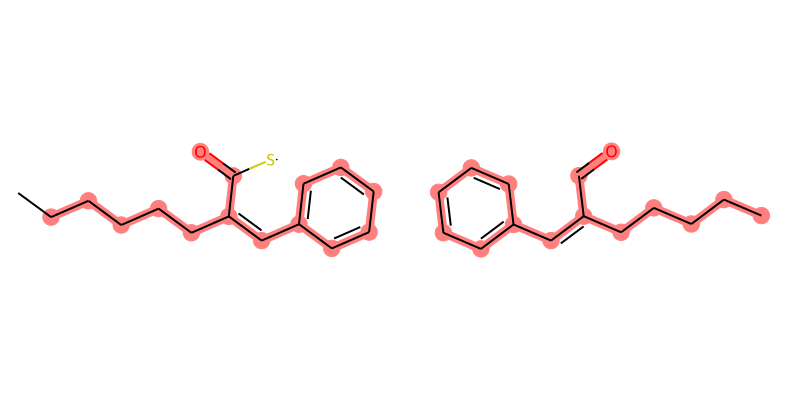

#### building Aminocaproic acid ####
computing module 1
   testing 1404 designs
   best score is 0.3288590604026845
computing module 2
   testing 1350 designs
   best score is 0.22522522522522526
PKS design: [["AT{'substrate': 'Methylmalonyl-CoA'}", 'loading: True'], ["AT{'substrate': 'butmal'}", "KR{'type': 'C1'}", 'loading: False']]
score: 0.3288590604026845


0.5384615384615384

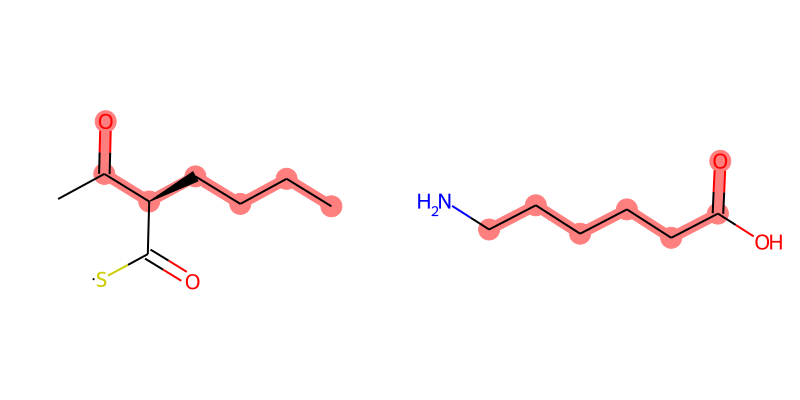

#### building Aminolevulinic acid ####
computing module 1
   testing 1404 designs
   best score is 0.25316455696202533
computing module 2
   testing 1350 designs
   best score is 0.2100840336134454
PKS design: [["AT{'substrate': 'butmal'}", 'loading: True'], ["AT{'substrate': 'mxmal'}", 'loading: False']]
score: 0.25316455696202533


0.42857142857142855

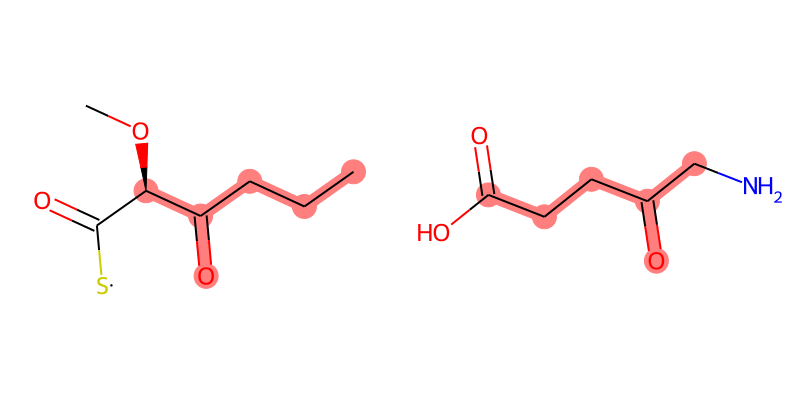

#### building Azelaic acid ####
computing module 1
   testing 1404 designs
   best score is 0.3527859041919591
computing module 2
   testing 1350 designs
   best score is 0.29172769623106914
PKS design: [["AT{'substrate': 'mxmal'}", 'loading: True'], ["AT{'substrate': 'hexmal'}", "KR{'type': 'B1'}", 'loading: False']]
score: 0.3527859041919591


0.5555555555555556

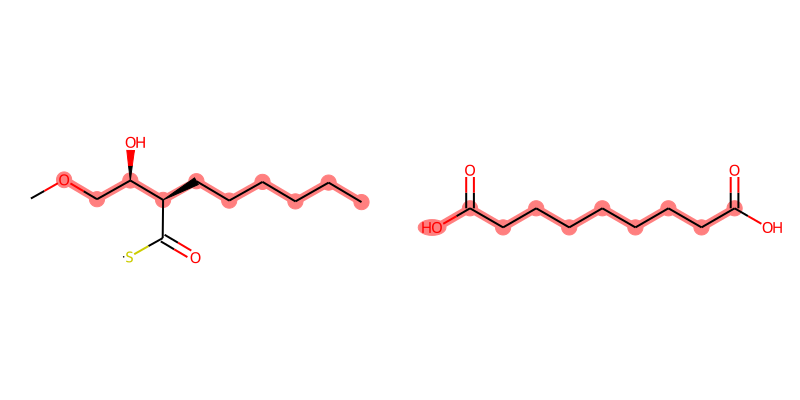

#### building Bempedoic acid ####
computing module 1
   testing 1404 designs
   best score is 0.2224072144917241
computing module 2
   testing 1350 designs
   best score is 0.31090299065651156
computing module 3
   testing 1350 designs
   best score is 0.3032316223004611
PKS design: [["AT{'substrate': 'isobut'}", 'loading: True'], ["AT{'substrate': 'hexmal'}", "KR{'type': 'B1'}", 'loading: False'], ["AT{'substrate': 'hexmal'}", "KR{'type': 'B1'}", 'DH{}', 'ER{}', 'loading: False']]
score: 0.31090299065651156


0.46875

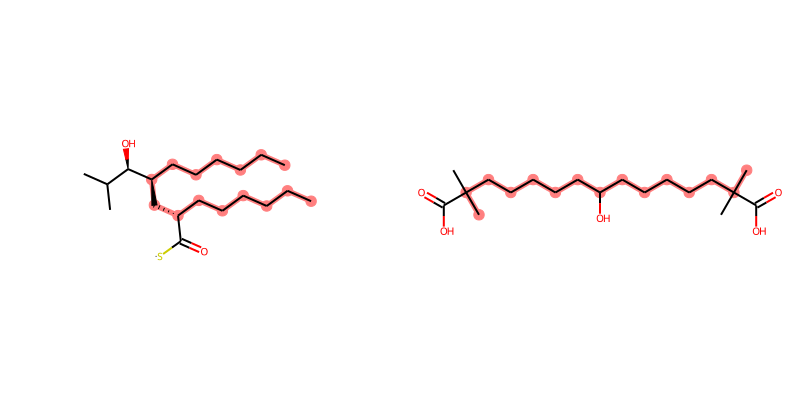

CPU times: total: 19min 31s
Wall time: 19min 32s


In [13]:
%%time
for name, smiles in substrateLibrary.items():
    print('#### building ' + name + ' ####')
    targetMol = Chem.MolFromSmiles(smiles)
    designs = designPKS(targetMol, maxDesignsPerRound=25, similarity="atomatompath")
    print('PKS design: ' + repr(designs[-1][0][0].modules))
    print('score: ' + str(designs[-1][0][1]))
    product = designs[-1][0][0].computeProduct(structureDB)
    
    display(plotMolComparison(product, targetMol))

In [14]:
def my_similarity(mol1, mol2):
    f = lambda m: AllChem.GetMorganFingerprintAsBitVect(m, radius=3, useFeatures=False, useChirality=True, nBits=2048)
    fps = [f(mol) for mol in (mol1, mol2)]
    metric = DataStructs.AllBitSimilarity
    score = metric(fps[1], fps[0])
    return score

%%time
for name, smiles in substrateLibrary.items():
    print('#### building ' + name + ' ####')
    targetMol = Chem.MolFromSmiles(smiles)
    designs = designPKS(targetMol, maxDesignsPerRound=25, similarity=my_similarity)
    print('PKS design: ' + repr(designs[-1][0][0].modules))
    print('score: ' + str(designs[-1][0][1]))
    product = designs[-1][0][0].computeProduct(structureDB)
    
    display(plotMolComparison(product, targetMol))

UsageError: Line magic function `%%time` not found.
